# Section 14: Exploratory Data Analysis (EDA)

* Descriptive Statistics
* Correlation & Correlation - Statistic
* GroupBy
* Anova

In [ ]:
link = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
#import library
import pandas as pd

df = pd.read_csv(link)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Section 14.1: Descriptive Statistic

### Correlation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
#select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

#generate correlation
df_numeric.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [ ]:
#now look at the correlation of selected columns
df[['engine-size','city-mpg','bore', 'stroke', 'horsepower', 'price']].corr()

,engine-size,city-mpg,bore,stroke,horsepower,price
engine-size,1.000000,-0.650546,0.572609,0.209523,0.822676,0.872335
city-mpg,-0.650546,1.000000,-0.582027,-0.034696,-0.822214,-0.686571
bore,0.572609,-0.582027,1.000000,-0.055390,0.566936,0.543155
stroke,0.209523,-0.034696,-0.055390,1.000000,0.098462,0.082310
horsepower,0.822676,-0.822214,0.566936,0.098462,1.000000,0.809575
price,0.872335,-0.686571,0.543155,0.082310,0.809575,1.000000


## Section 14.2: Correlation & Correlation Statistic

(0.0, 53061.00244392618)

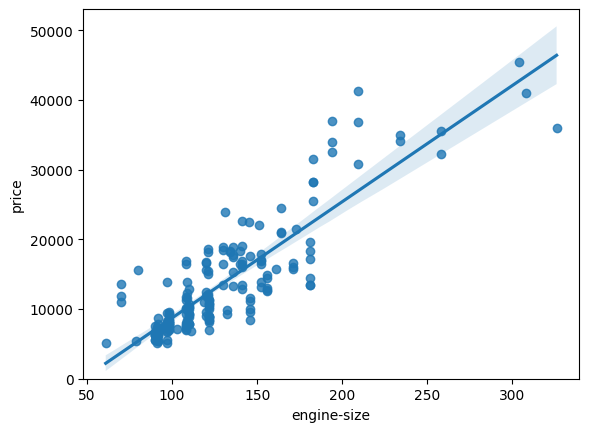

In [ ]:
#import libraries for visualisation
from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

<Axes: xlabel='city-mpg', ylabel='price'>

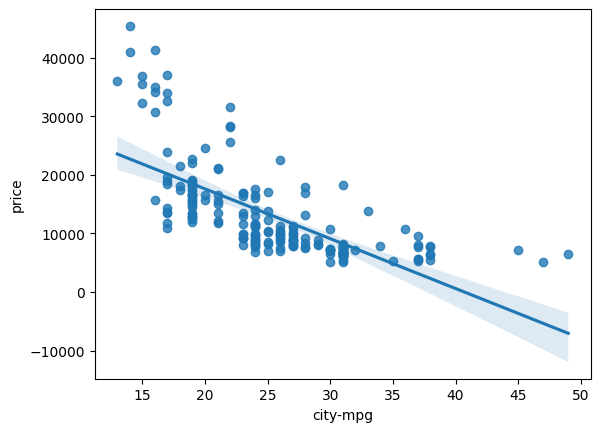

In [ ]:
sns.regplot(x='city-mpg', y='price', data=df)

<Axes: xlabel='stroke', ylabel='price'>

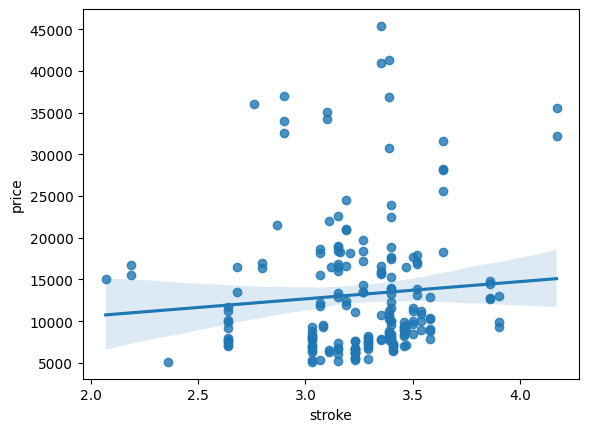

In [ ]:
sns.regplot(x='stroke', y='price', data=df)

In [ ]:
#import scipy to calculate pearson correlation
# calculate correlation and p-value
import scipy.stats as st

correlation, p_value = st.pearsonr(df['engine-size'], df['price'])
print("The correlation is", correlation, 'and the p_value is: ', p_value)
#strong correlation

The correlation is 0.8723351674455185 and the p_value is:  9.265491622198793e-64


In [ ]:
# calculate correlation and p-value
correlation, p_value = st.pearsonr(df['city-mpg'], df['price'])
print("The correlation is", correlation, 'and the p_value is: ', p_value)
#Not a strong correlation

The correlation is -0.6865710067844678 and the p_value is:  2.3211320655675098e-29


In [ ]:
# calculate correlation and p-value
correlation, p_value = st.pearsonr(df['stroke'], df['price'])
print("The correlation is", correlation, 'and the p_value is: ', p_value)
#Not a strong correlation

ValueError: array must not contain infs or NaNs

In [ ]:
df['stroke'].isnull().sum()

4

In [ ]:
import numpy as np
df['stroke'].replace(np.nan, df['stroke'].mean(), inplace=True)

### Box Plot

<Axes: xlabel='drive-wheels', ylabel='price'>

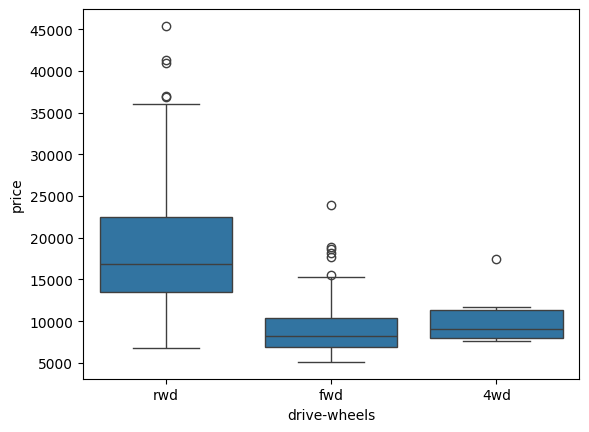

In [ ]:
sns.boxplot(x='drive-wheels', y='price', data=df)

<Axes: xlabel='body-style', ylabel='price'>

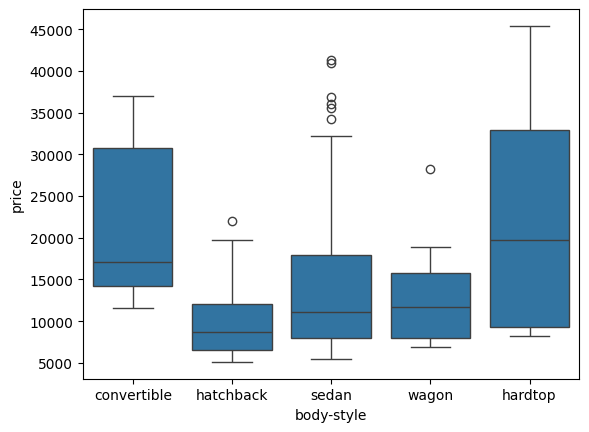

In [ ]:
sns.boxplot(x='body-style', y='price', data=df)

<Axes: xlabel='make', ylabel='price'>

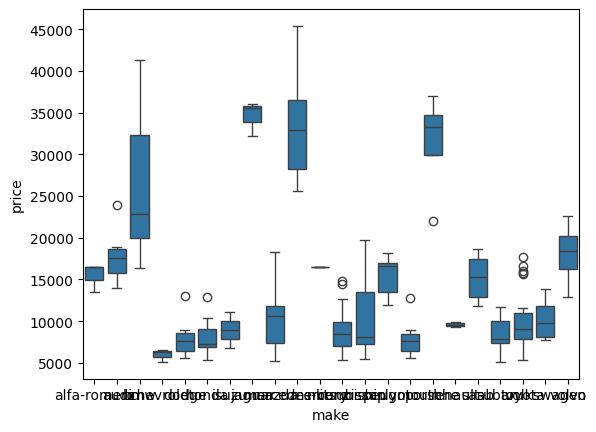

In [ ]:
sns.boxplot(x='make', y='price', data=df)

## Section 14.2: GroupBy

In [ ]:
df1 = df[['drive-wheels', 'body-style', 'price']]
df1_group = df1.groupby(['drive-wheels','body-style'], as_index=True).mean()
df1_group

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

In [ ]:
df1 = df[['drive-wheels', 'body-style', 'price']]
df1_group = df1.groupby(['drive-wheels','body-style'], as_index=False).mean()
df1_group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### Pivot-Table

In [ ]:
#in pivot the rows is called index
#To make the pivot table the above make sure index needs to be False (refer above)
df1_pivot = df1_group.pivot(index='body-style', columns='drive-wheels')

df1_pivot

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

### Heatmap

<Axes: xlabel='None-drive-wheels', ylabel='body-style'>

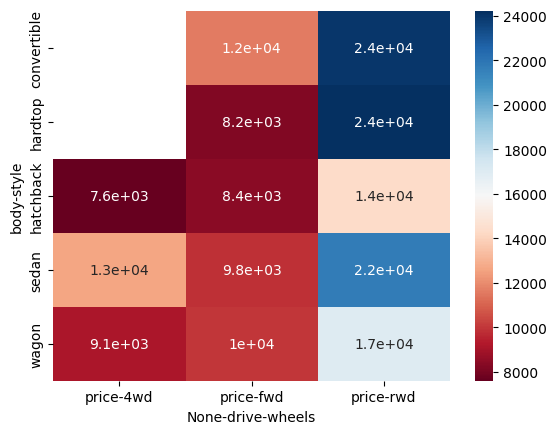

In [ ]:
sns.heatmap(df1_pivot, annot=True, cmap='RdBu')
#annot will show the value

<function matplotlib.pyplot.show(close=None, block=None)>

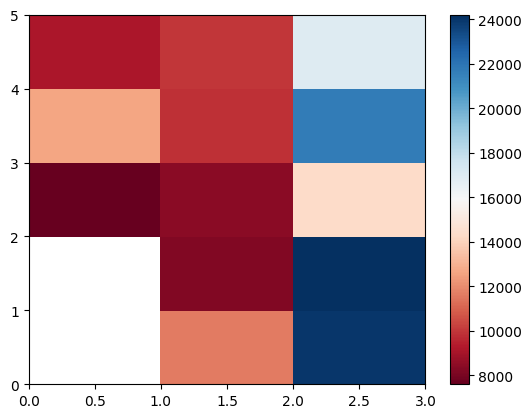

In [ ]:
plt.pcolor(df1_pivot, cmap='RdBu')
plt.colorbar()
plt.show

<Axes: >

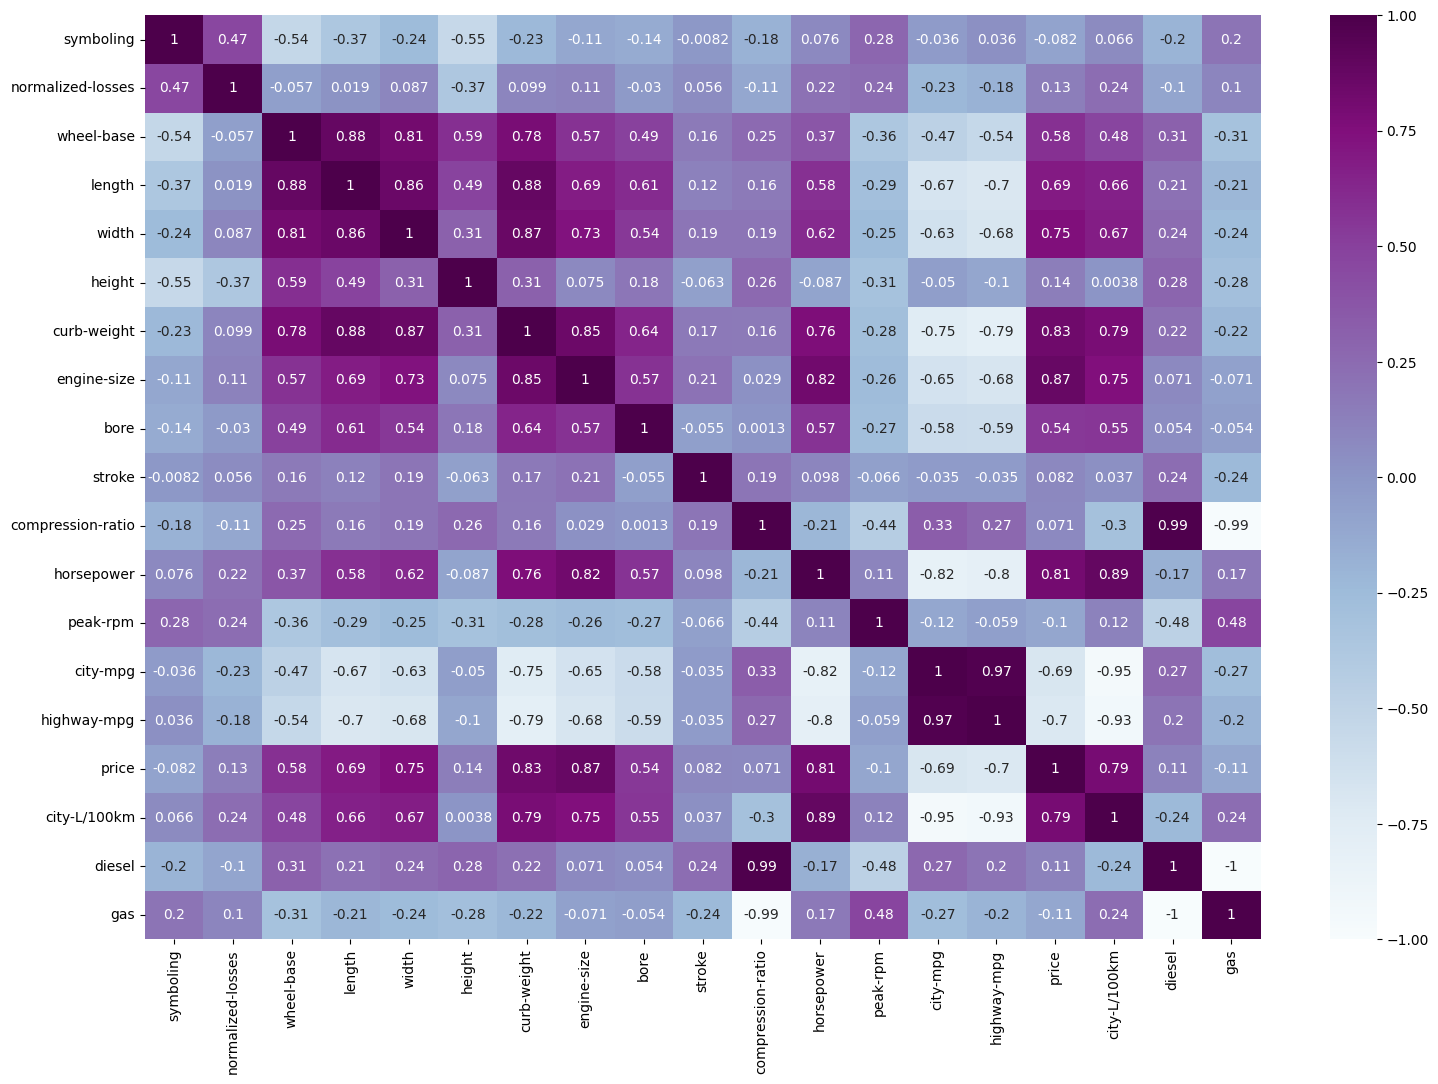

In [ ]:
plt.figure(figsize=(18,12)) #Resize the heatmap
#make sure the resize formula is on top of the heatmap formula
#try to be less than 18 in computer screen (18, no. ni tak kisah brape)
sns.heatmap(df_numeric.corr(), annot = True, cmap='BuPu')

In [ ]:
df2 = df[['num-of-doors', 'aspiration', 'price']]
df2_group = df2.groupby(['num-of-doors', 'aspiration'], as_index=False).mean()
df2_group

,num-of-doors,aspiration,price
0,four,std,12509.847826
1,four,turbo,17450.782609
2,two,std,12582.931507
3,two,turbo,14138.846154


In [ ]:
df2_pivot = df2_group.pivot(index='num-of-doors', columns='aspiration')

df2_pivot

price              
aspiration             std         turbo
num-of-doors                            
four          12509.847826  17450.782609
two           12582.931507  14138.846154

<Axes: xlabel='None-aspiration', ylabel='num-of-doors'>

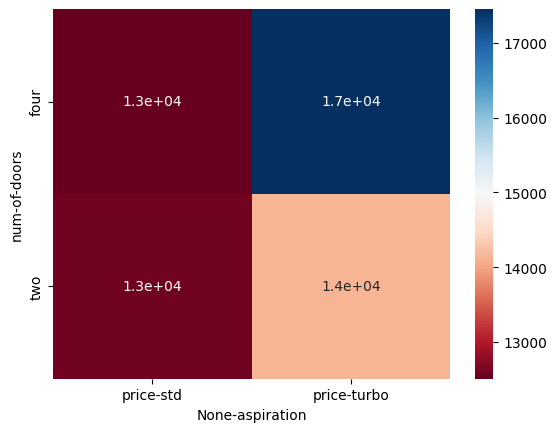

In [ ]:
sns.heatmap(df2_pivot, annot=True, cmap='RdBu')

In [ ]:
#Method1: To select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

#generate correlation
df_numeric.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.007992,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055127,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.157964,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123913,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188814,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060822,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167412,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205806,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.098282,-0.063388,-0.034079,-0.034741,0.082267,0.036285,0.241033,-0.241033


<Axes: xlabel='symboling', ylabel='price'>

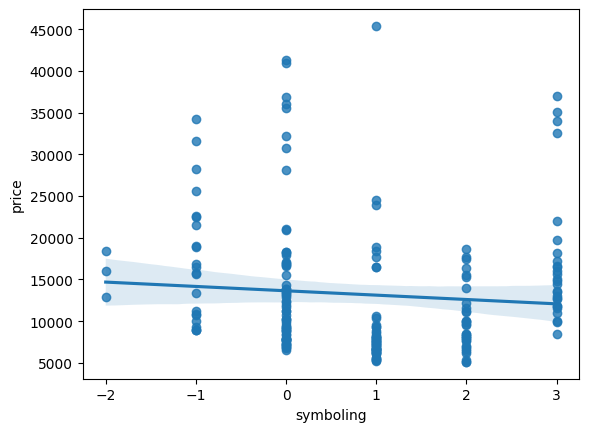

In [ ]:
#import libraries for visualisation
from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x='symboling', y='price', data=df)

<Axes: xlabel='normalized-losses', ylabel='price'>

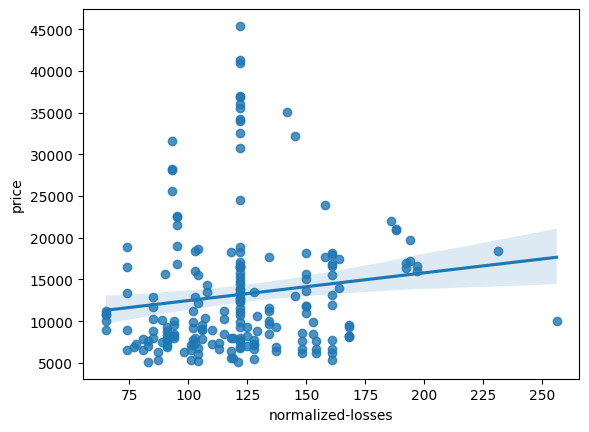

In [ ]:
#import libraries for visualisation
from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x='normalized-losses', y='price', data=df)

<Axes: xlabel='wheel-base', ylabel='price'>

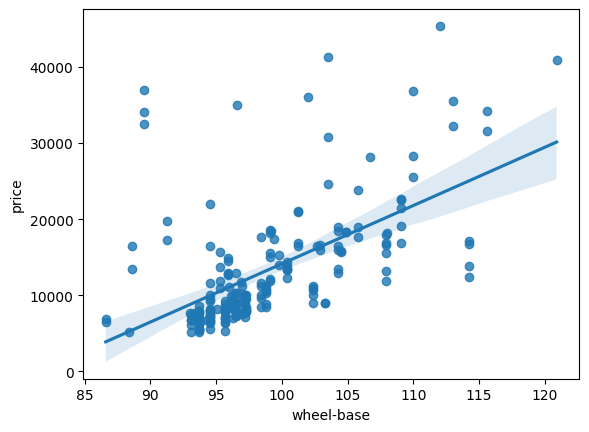

In [ ]:
#import libraries for visualisation
from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x='wheel-base', y='price', data=df)

<Axes: xlabel='length', ylabel='price'>

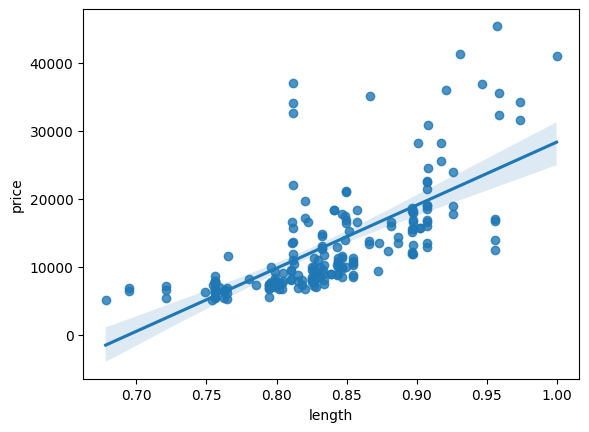

In [ ]:
#import libraries for visualisation
from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x='length', y='price', data=df)

In [ ]:
#Data Splitting Section
#import numpy library
import numpy as np

# mask
# Create a boolean mask where approximately 80% of the values are True
msk = np.random.rand(len(df)) < 0.8 # length of the dataset lower than 80% of data will randomly chosen for the testing group

train = df[msk] #Use the mask to select approximately 80% of the data for the training set
test = df[~msk] #Use the inverse of the mask to select the remaining 20% of the data for the testing set

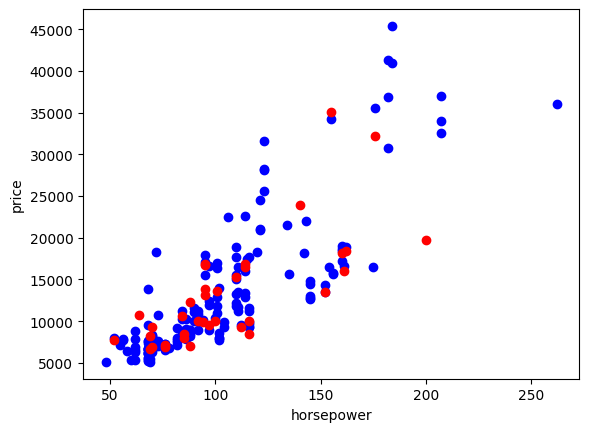

In [ ]:
plt.scatter(train.horsepower, train.price, color='blue')
plt.scatter(test.horsepower, test.price, color='red')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

#### Simple Linear Regression

In [ ]:
#From sklearn library we import the linear model and R2_score
from sklearn import linear_model
from sklearn.metrics import r2_score

# horsepower vs price
#Create the linear regression object (variable regr)
regr = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['horsepower']])
train_y = np.asanyarray(train[['price']])

#Training
regr.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['horsepower']])
test_y = np.asanyarray(test[['price']])

test_y_=regr.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  49.7
The MSE is:  2143577851.86
The MAE is:  358564.37


In [ ]:
#Length vs Price
#Create the linear regression object (variable regr)
regr2 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['length']])
train_y = np.asanyarray(train[['price']])

#Training
regr2.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['length']])
test_y = np.asanyarray(test[['price']])

test_y_=regr2.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  27.53
The MSE is:  3088113330.42
The MAE is:  440368.54


In [ ]:
#height vs Price
#Create the linear regression object (variable regr)
regr3 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['height']])
train_y = np.asanyarray(train[['price']])

#Training
regr3.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['height']])
test_y = np.asanyarray(test[['price']])

test_y_=regr3.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  -3.47
The MSE is:  4409255242.78
The MAE is:  488142.0


**ERROR ALERT!!**
* Why is the R2-score is negative? Go back and check the correlation values
* The correlation between price and height is = 0.135486 (so the corellation is not strong)
* The correlation will be stronger if it's nearing to 1
* So takyah check, check yang strong correlation je

In [ ]:
#engine-size vs Price
#Create the linear regression object (variable regr)
regr4 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['engine-size']])
train_y = np.asanyarray(train[['price']])

#Training
regr4.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['engine-size']])
test_y = np.asanyarray(test[['price']])

test_y_=regr4.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  58.83
The MSE is:  1754223275.19
The MAE is:  309268.22


In [ ]:
#width vs Price
#Create the linear regression object (variable regr)
regr5 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['width']])
train_y = np.asanyarray(train[['price']])

#Training
regr5.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['width']])
test_y = np.asanyarray(test[['price']])

test_y_=regr5.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  62.56
The MSE is:  1595195614.33
The MAE is:  328584.89


In [ ]:
#curb-weight vs Price
#Create the linear regression object (variable regr)
regr6 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['curb-weight']])
train_y = np.asanyarray(train[['price']])

#Training
regr6.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['curb-weight']])
test_y = np.asanyarray(test[['price']])

test_y_=regr6.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  66.01
The MSE is:  1448542384.08
The MAE is:  281985.69


In [ ]:
#bore vs Price
#Create the linear regression object (variable regr)
regr7 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['bore']])
train_y = np.asanyarray(train[['price']])

#Training
regr7.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['bore']])
test_y = np.asanyarray(test[['price']])

test_y_=regr7.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  13.21
The MSE is:  3698229388.41
The MAE is:  439096.32


In [ ]:
#horsepower vs Price
#Create the linear regression object (variable regr)
regr8 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['horsepower']])
train_y = np.asanyarray(train[['price']])

#Training
regr8.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['horsepower']])
test_y = np.asanyarray(test[['price']])

test_y_=regr8.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  49.7
The MSE is:  2143577851.86
The MAE is:  358564.37


In [ ]:
#city-mpg vs Price
#Create the linear regression object (variable regr)
regr9 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['city-mpg']])
train_y = np.asanyarray(train[['price']])

#Training
regr9.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['city-mpg']])
test_y = np.asanyarray(test[['price']])

test_y_=regr9.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  53.22
The MSE is:  1993480223.58
The MAE is:  345540.39


In [ ]:
#highway-mpg vs Price
#Create the linear regression object (variable regr)
regr10 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['highway-mpg']])
train_y = np.asanyarray(train[['price']])

#Training
regr10.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['highway-mpg']])
test_y = np.asanyarray(test[['price']])

test_y_=regr10.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  59.12
The MSE is:  1741913936.79
The MAE is:  323951.11


In [ ]:
#city-L/100km  vs Price
#Create the linear regression object (variable regr)
regr11 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['city-L/100km']])
train_y = np.asanyarray(train[['price']])

#Training
regr11.fit(train_x, train_y)

#Prepare the test data
test_x = np.asanyarray(test[['city-L/100km']])
test_y = np.asanyarray(test[['price']])

test_y_=regr11.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  61.52
The MSE is:  1639509352.27
The MAE is:  302330.92


In [ ]:
#Dictionary - define how to sort the correlation
import pandas as pd

def calculate_and_sort_correlations(data, target_feature):
    """
    Calculate the correlation of the target_feature to all other features
    and sort them in ascending order.

    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    target_feature (str): The feature to calculate correlations against.

    Returns:
    pd.Series: Correlations of target_feature with other features, sorted in ascending order.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr(numeric_only=True)

    # Extract the correlations for the target feature
    correlations = correlation_matrix[target_feature]

    # Drop the target feature itself
    correlations = correlations.drop(target_feature)

    # Sort the correlations in ascending order
    sorted_correlations = correlations.sort_values(ascending=True)

    return sorted_correlations

In [ ]:
calculate_and_sort_correlations(df,'price')

highway-mpg         -0.704692
city-mpg            -0.686571
gas                 -0.110326
peak-rpm            -0.101616
symboling           -0.082391
compression-ratio    0.071107
stroke               0.082267
diesel               0.110326
normalized-losses    0.133999
height               0.135486
bore                 0.543155
wheel-base           0.584642
length               0.690628
width                0.751265
city-L/100km         0.789898
horsepower           0.809575
curb-weight          0.834415
engine-size          0.872335
Name: price, dtype: float64